## Seaborn Library!

Inside of sns.set_context(" "):

'paper' – for small plots

'notebook' – balanced for Jupyter notebooks

'talk' – bigger for presentations

'poster' – even larger for posters or slides

sns.despine(left = True, bottom = True) gets rid of left and bottom axes.

# Datasets

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import mode

sns.get_dataset_names()
# Arguments x, y, size, and hue are set equal to a column. 
# palette argument requires hue argument.

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

# Scatter Plots

"A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables."

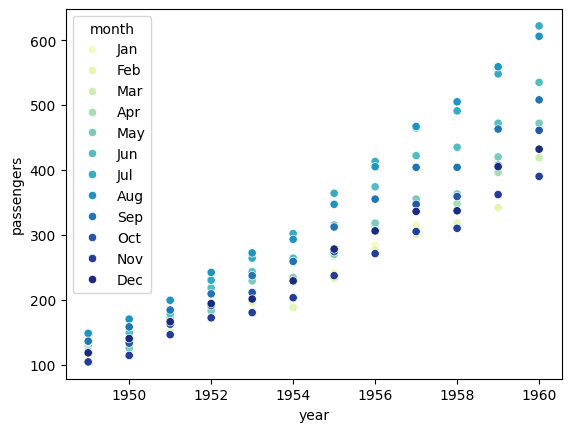

In [ ]:
flights = sns.load_dataset("flights")
sns.scatterplot(data = flights, x='year', y='passengers',
                hue = 'month', palette='YlGnBu')
plt.show()
#flights

# Regression Plots

Scatter plots with a regression line (aka line of best fit).

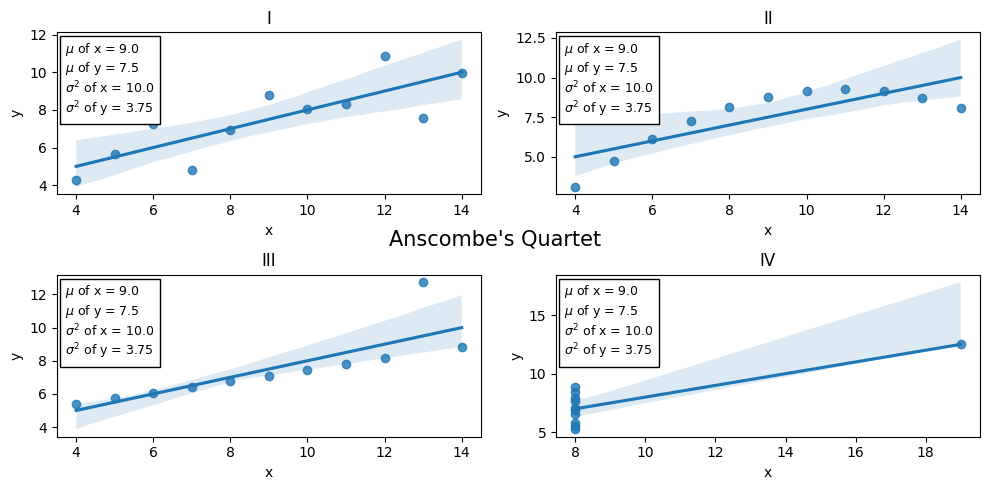

In [2]:
anscombe = sns.load_dataset('anscombe')

d1 = anscombe[anscombe['dataset'] == 'I']
d2 = anscombe[anscombe['dataset'] == 'II']
d3 = anscombe[anscombe['dataset'] == 'III']
d4 = anscombe[anscombe['dataset'] == 'IV']

d1stats = '\n'.join((rf"$\mu$ of x = {round(np.mean(d1['x']), 2)}",
                     rf'$\mu$ of y = {round(np.mean(d1['y']), 2)}',
                     rf'$\sigma^2$ of x = {round(np.var(d1['x']), 2)}',
                     rf'$\sigma^2$ of y = {round(np.var(d1['y']), 2)}'))

d2stats = '\n'.join((rf'$\mu$ of x = {round(np.mean(d2['x']), 2)}',
                     rf'$\mu$ of y = {round(np.mean(d2['y']), 2)}',
                     rf'$\sigma^2$ of x = {round(np.var(d2['x']), 2)}',
                     rf'$\sigma^2$ of y = {round(np.var(d2['y']), 2)}'))

d3stats = '\n'.join((rf'$\mu$ of x = {round(np.mean(d3['x']), 2)}',
                     rf'$\mu$ of y = {round(np.mean(d3['y']), 2)}',
                     rf'$\sigma^2$ of x = {round(np.var(d3['x']), 2)}',
                     rf'$\sigma^2$ of y = {round(np.var(d3['y']), 2)}'))

d4stats = '\n'.join((rf'$\mu$ of x = {round(np.mean(d4['x']), 2)}',
                     rf'$\mu$ of y = {round(np.mean(d4['y']), 2)}',
                     rf'$\sigma^2$ of x = {round(np.var(d4['x']), 2)}',
                     rf'$\sigma^2$ of y = {round(np.var(d4['y']), 2)}'))


fig, axes = plt.subplots(2, 2, figsize = (10, 5))
ax = axes[0][0]
sns.regplot(data = d1, x = 'x', y = 'y', ax = ax)
ax.set_title('I')
ax.text(0.02, 0.5, d1stats, transform = ax.transAxes, 
        bbox = dict(edgecolor = 'black', facecolor = 'white'), fontsize = 9)

ax = axes[0][1]
sns.regplot(data = d2, x = 'x', y = 'y', ax = ax)
ax.set_title('II')
ax.text(0.02, 0.5, d2stats, transform = ax.transAxes, 
        bbox = dict(edgecolor = 'black', facecolor = 'white'), fontsize = 9)

ax = axes[1][0]
sns.regplot(data = d3, x = 'x', y = 'y', ax = ax)
axes[1][0].set_title('III')
ax.text(0.02, 0.5, d3stats, transform = ax.transAxes, 
        bbox = dict(edgecolor = 'black', facecolor = 'white'), fontsize = 9)

ax = axes[1][1]
sns.regplot(data = d4, x = 'x', y = 'y', ax = ax)
axes[1][1].set_title('IV')
ax.text(0.02, 0.5, d4stats, transform = ax.transAxes, 
        bbox = dict(edgecolor = 'black', facecolor = 'white'), fontsize = 9)

fig.text(0.5, 0.5, "Anscombe's Quartet", ha = 'center', fontsize = 15)
plt.tight_layout()
plt.show()

# Histoplots

"A chart that plots the distribution of a numeric variable's values as a series of bars. Each bar typically covers a range of numeric values called a bin or class; a bar's height indicates the frequency of data points with a value within the corresponding bin."

"A kernel density plot, also known as a KDE plot, is a visualization technique used to represent the distribution of a dataset. It displays the probability density of a continuous variable, offering a smoothed-out view of the data's distribution compared to a histogram."

<Axes: xlabel='age', ylabel='Count'>

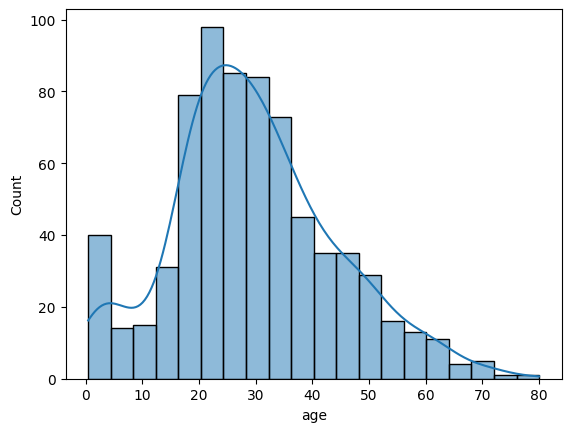

In [ ]:
titanic = sns.load_dataset('titanic')
sns.histplot(titanic['age'], kde = True)
plt.show()
#titanic 

# Kernel Density Estimate Plots (KDEs)

They essentially trace the borders of a histogram plot.

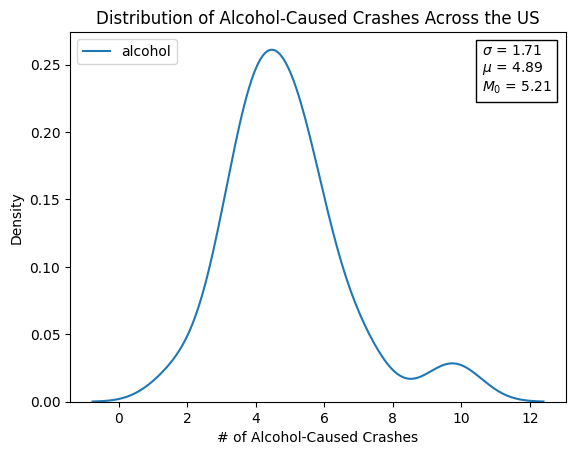

In [6]:
crash = sns.load_dataset('car_crashes')
alcohol_crash = crash.pivot_table(index = 'abbrev', values = 'alcohol')
sns.kdeplot(data = alcohol_crash, label = 'alcohol')

md = mode(alcohol_crash['alcohol'], keepdims = True)
stats = "\n".join((rf'$\sigma$ = {round(np.std(alcohol_crash['alcohol']), 2)}',
                    rf'$\mu$ = {round(np.mean(alcohol_crash['alcohol']), 2)}',
                    rf'$M_0$ = {round(md.mode[0], 2)}'))
plt.title('Distribution of Alcohol-Caused Crashes Across the US')
plt.xlabel('# of Alcohol-Caused Crashes')
plt.text(10.6, 0.23, stats, bbox = dict(edgecolor = 'black', facecolor = 'white'))
plt.legend(loc = 'upper left')
plt.show()

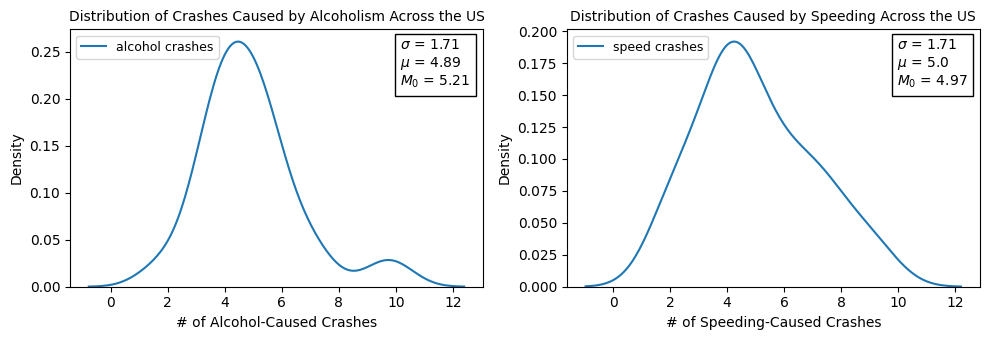

In [56]:
crash = sns.load_dataset('car_crashes')
alcohol_crash = crash.pivot_table(index = 'abbrev', values = 'alcohol')

fig, axes = plt.subplots(1, 2, figsize = (10, 3.5))

md1 = mode(alcohol_crash['alcohol'], keepdims = True)
alcostats = "\n".join((rf'$\sigma$ = {round(np.std(alcohol_crash['alcohol']), 2)}',
                    rf'$\mu$ = {round(np.mean(alcohol_crash['alcohol']), 2)}',
                    rf'$M_0$ = {round(md1.mode[0], 2)}'))
ax = axes[0]
sns.kdeplot(data = alcohol_crash, label = 'alcohol crashes', ax = ax) 
# The first ax equals ax because on the previous line, the second ax = axes[0]. This places the KDE Plot on the first figure.
ax.set_title('Distribution of Crashes Caused by Alcoholism Across the US', fontsize = 10)
ax.set_xlabel('# of Alcohol-Caused Crashes')
ax.text(0.8, 0.78, alcostats, transform = ax.transAxes, bbox = dict(edgecolor = 'black', facecolor = 'white'))
# The transform keyword being equal to ax.transAxes changes the coordinate system to be based off the figure.
ax.legend(loc = 'upper left', fontsize = 9)

speed_crash = crash.pivot_table(index = 'abbrev', values = 'speeding')
md2 = mode(speed_crash['speeding'], keepdims = True)
speedstats = "\n".join((rf'$\sigma$ = {round(np.std(alcohol_crash['alcohol']), 2)}',
                        rf'$\mu$ = {round(np.mean(speed_crash), 2)}',
                        rf'$M_0$ = {round(md2.mode[0], 2)}'))  
ax = axes[1]
sns.kdeplot(data = speed_crash, label = 'speed crashes', ax = ax)
ax.set_title('Distribution of Crashes Caused by Speeding Across the US', fontsize = 10)
ax.set_xlabel('# of Speeding-Caused Crashes')
ax.text(0.8, 0.78, speedstats, transform = ax.transAxes, bbox = dict(edgecolor = 'black', facecolor = 'white'))
plt.legend(loc = 'upper left', fontsize = 9)
plt.tight_layout()
plt.show()

# Bar Plots

"A bar plot represents categorical data with rectangular bars, where the length or height corresponds to the category's value."

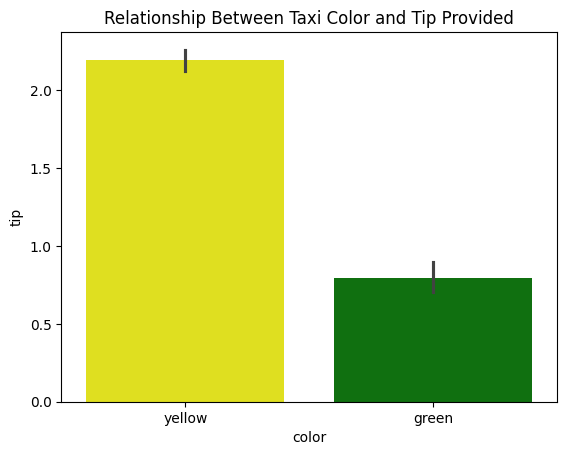

In [ ]:
taxis = sns.load_dataset('taxis')
custom = {'yellow': 'yellow', 'green': 'green'}
sns.barplot(data = taxis, x = 'color', y = 'tip', hue = 'color', palette = custom) #palette can be given custom colors with a dictionary.
plt.title('Relationship Between Taxi Color and Tip Provided')
plt.show()

# Box Plots

"A standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile, median, third quartile, and maximum."

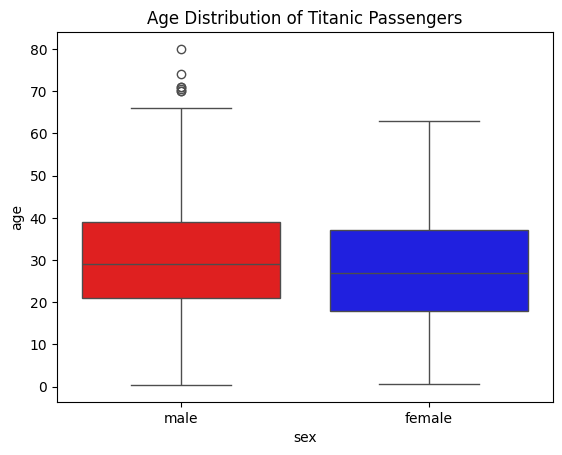

In [61]:
titanic = sns.load_dataset('titanic')
colors = {'male': 'red', 'female': 'blue'}
sns.boxplot(data = titanic, x = 'sex', y = 'age', hue = 'sex', palette = colors)
plt.title('Age Distribution of Titanic Passengers')
plt.show()
#titanic

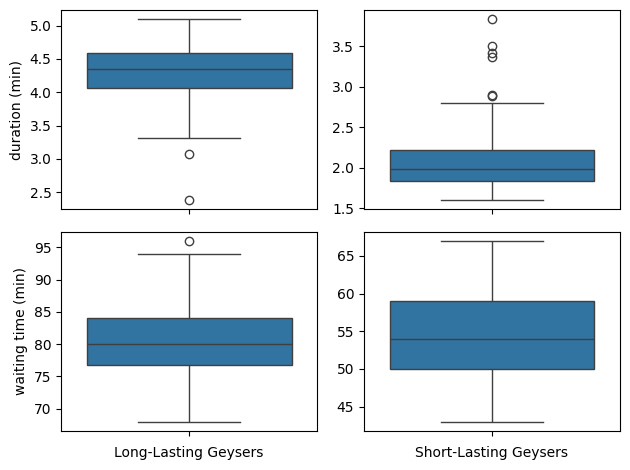

In [80]:
geyser = sns.load_dataset('geyser')
long = geyser[geyser['kind'] == 'long']
short = geyser[geyser['kind'] == 'short']

f, axes = plt.subplots(2, 2)
sns.boxplot(data = long, y = 'duration', ax = axes[0][0])
sns.boxplot(data = long, y = 'waiting', ax = axes[1][0])
sns.boxplot(data = short, y = 'duration', ax = axes[0][1])
sns.boxplot(data = short, y = 'waiting', ax = axes[1][1])

axes[1][0].set_xlabel('Long-Lasting Geysers')
axes[1][1].set_xlabel('Short-Lasting Geysers')
axes[0][0].set_ylabel('duration (min)')
axes[1][0].set_ylabel('waiting time (min)')
axes[1][1].set_ylabel('')
axes[0][1].set_ylabel('')
plt.tight_layout()
plt.show()

# Strip Plots

"A strip plot is a single-axis scatter plot that is used to visualise the distribution of many individual one-dimensional values."

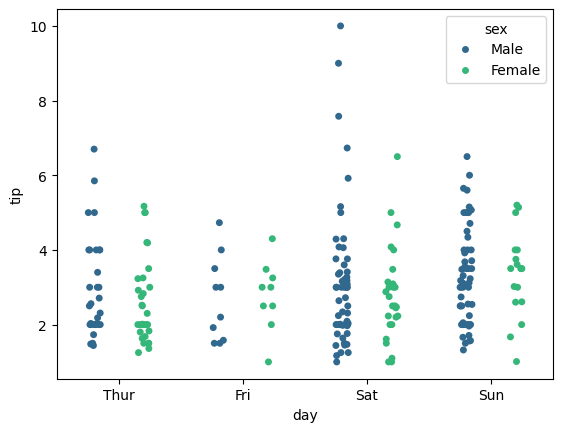

In [29]:
tips = sns.load_dataset("tips")
sns.stripplot(data = tips, x = 'day', y = 'tip', hue = 'sex', palette = 'viridis', dodge = True)
plt.show()
# dodge keyword separates the sexes.
#tips

# Joint Plots

"This multifaceted approach highlights the correlation or potential relationship between the two variables and provides insights into their distributions."

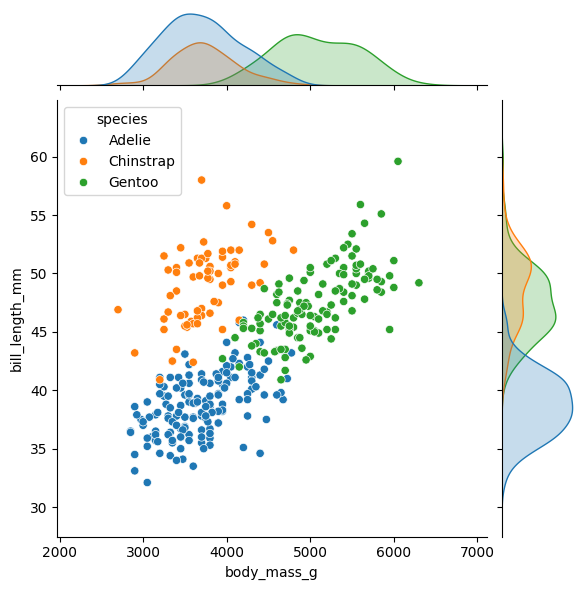

In [81]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data = penguins, x = 'body_mass_g', y = 'bill_length_mm', hue = 'species')
plt.show()
# penguins
# fill = True adds different shades to joint plot. cmap stands for color map.
# kind can equal kde, reg, or hex.

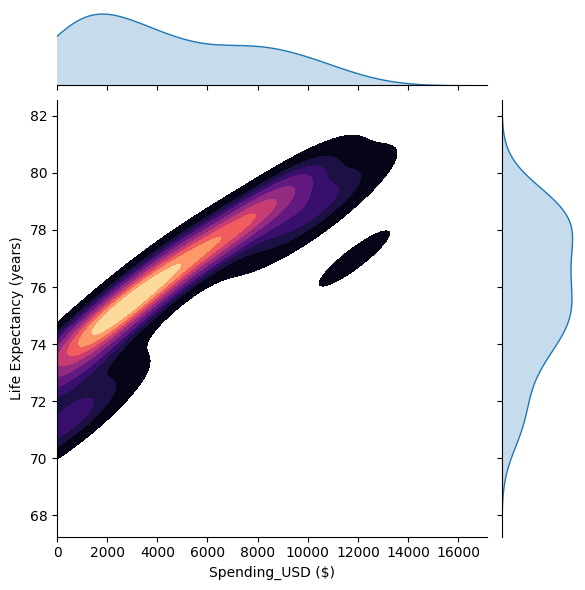

In [99]:
healthexp = sns.load_dataset('healthexp')
usa = healthexp[healthexp['Country'] == 'USA']
sns.jointplot(data = usa, x = 'Spending_USD', y = 'Life_Expectancy', kind = 'kde', cmap = 'magma', fill = True)
plt.xlim(0)
plt.xlabel('Spending_USD ($)')
plt.ylabel('Life Expectancy (years)')
plt.show()

# Pair Plots

"Pairplot allows us to plot pairwise relationships between variables within a data set."

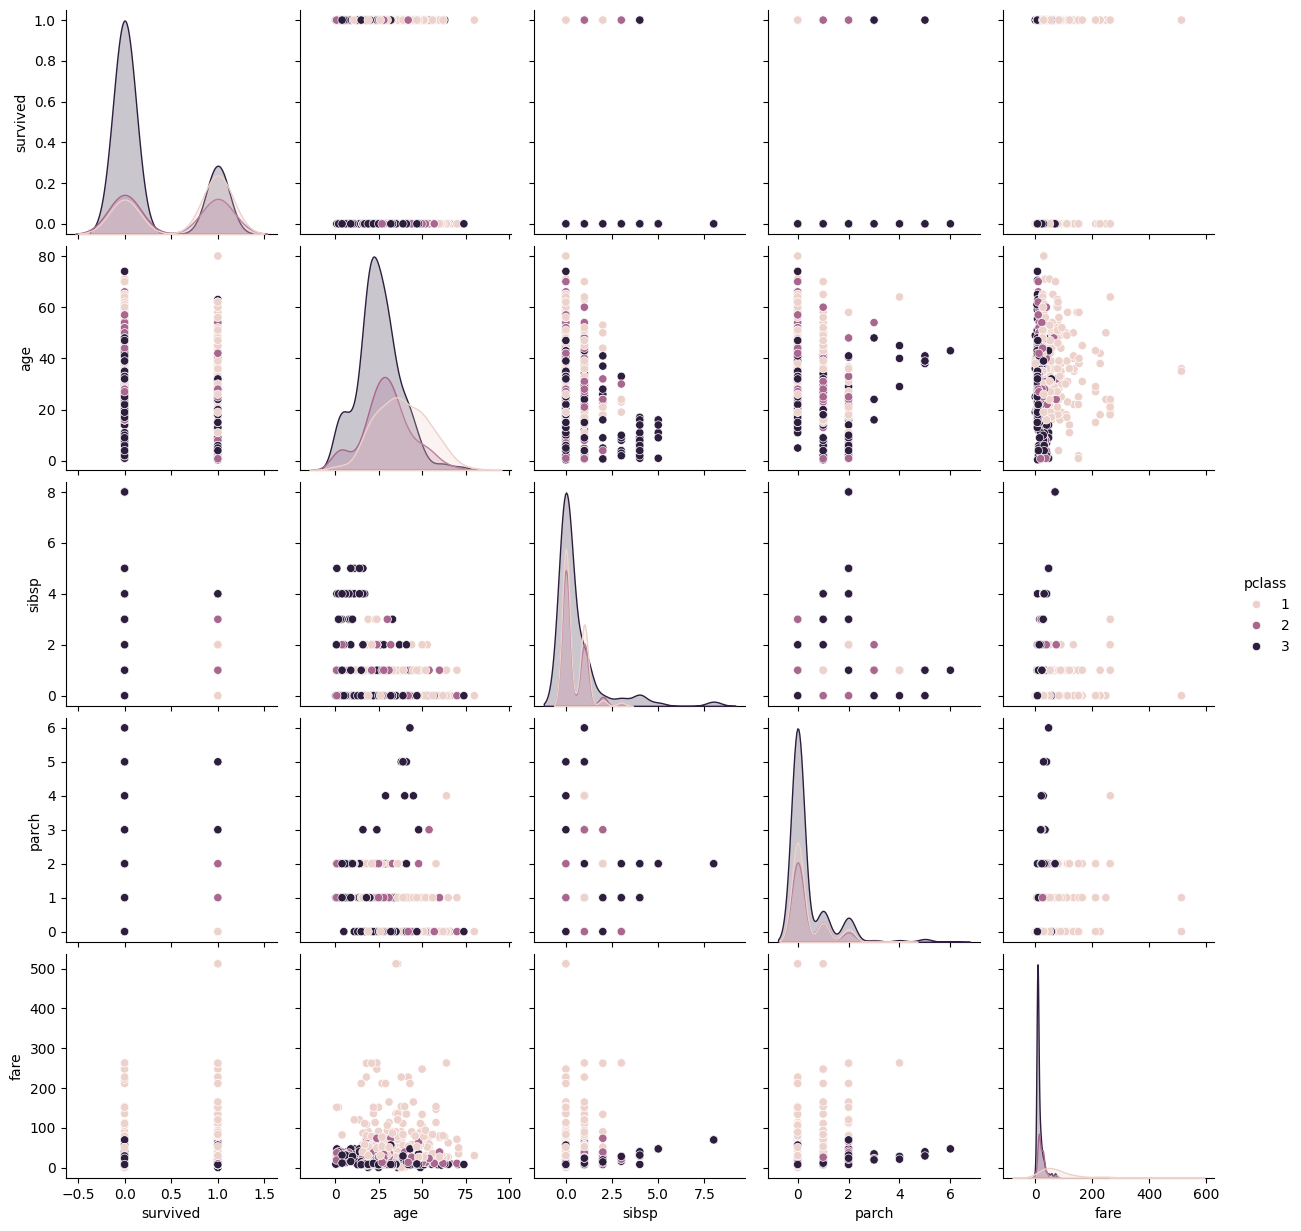

In [31]:
titanic = sns.load_dataset('titanic')
sns.pairplot(titanic.select_dtypes(['number']), hue = 'pclass')
plt.show()

# Heat Maps

"A heat map is a 2-dimensional data visualization technique that represents the magnitude of individual values within a dataset as a color. The variation in color may be by hue or intensity."

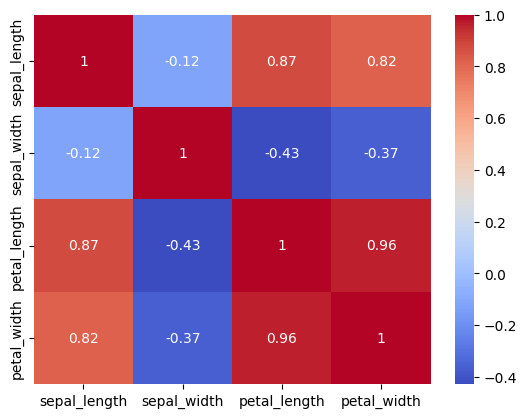

In [32]:
iris = sns.load_dataset('iris')
sns.heatmap(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(), annot = True, cmap = 'coolwarm')
plt.show()
# iris
# .corr() shows correlations between variables.
# annot = True displays the correlation coefficients.

<Axes: xlabel='year', ylabel='month'>

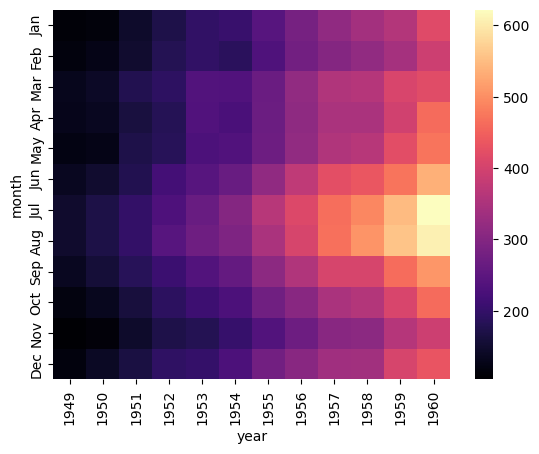

In [19]:
flights = sns.load_dataset('flights')
flights = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers', observed = False)
sns.heatmap(data = flights, cmap = 'magma')

# observed keyword shows all combinations of categorical variables even if they don't exist. 
# It must be included and set equal to False since even though it is False by default, future versions of Pandas will deprecate that value. 
# If they don't exist, an 'NaN' is displayed in the data frame.

# Cluster Map

"A clustermap refers to a visualization that combines a heatmap with hierarchical clustering."

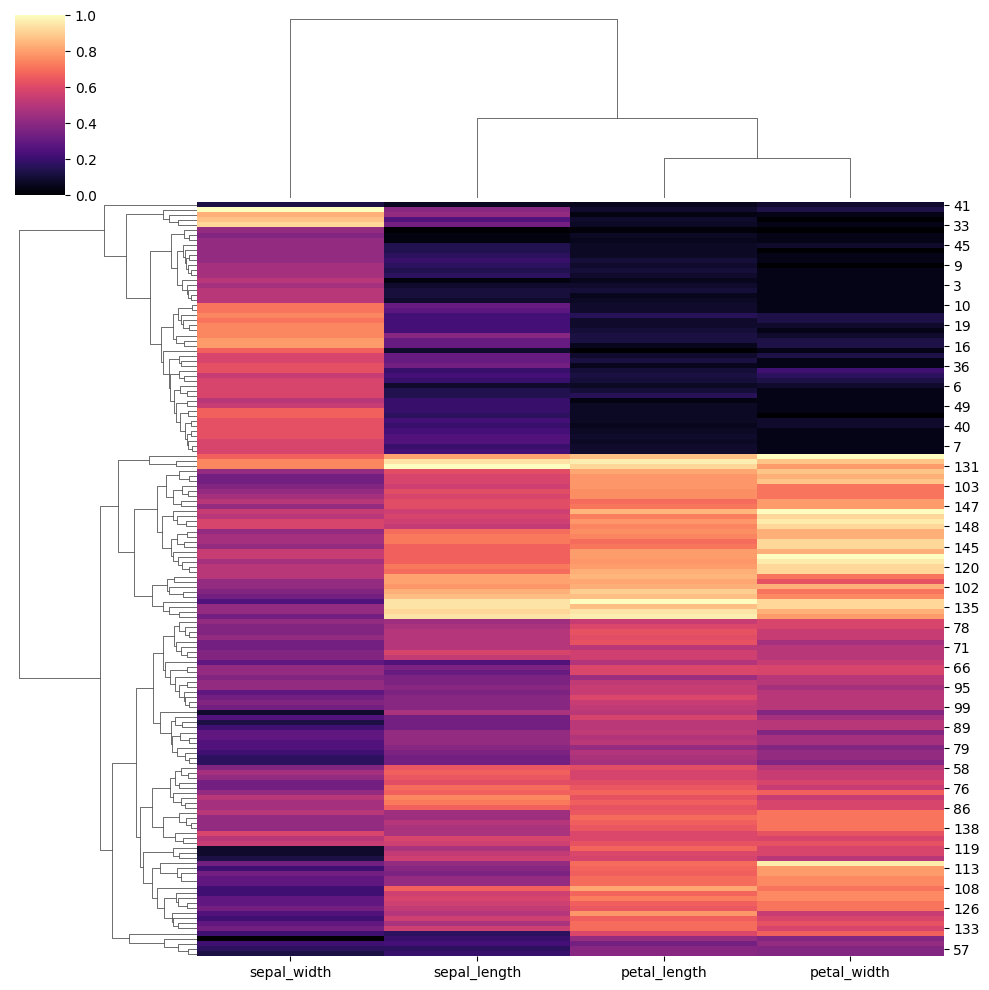

In [33]:
iris = sns.load_dataset('iris')
data = iris.drop("species", axis = 1)

# Clustered heatmap
sns.clustermap(data, cmap = "magma", standard_scale = 1)
plt.show()

# Line Plots

"Line plots are presented when you want to show continuous trends over a given period of time or equal intervals."

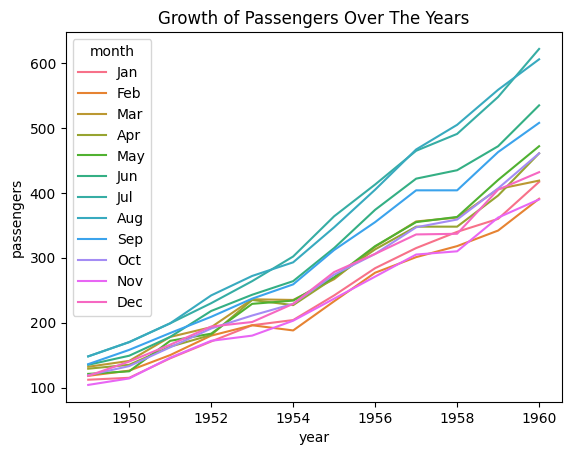

In [101]:
flights = sns.load_dataset('flights')

sns.lineplot(data = flights, x = 'year', y = 'passengers', hue = 'month')
plt.title('Growth of Passengers Over The Years')
plt.show()
# flights

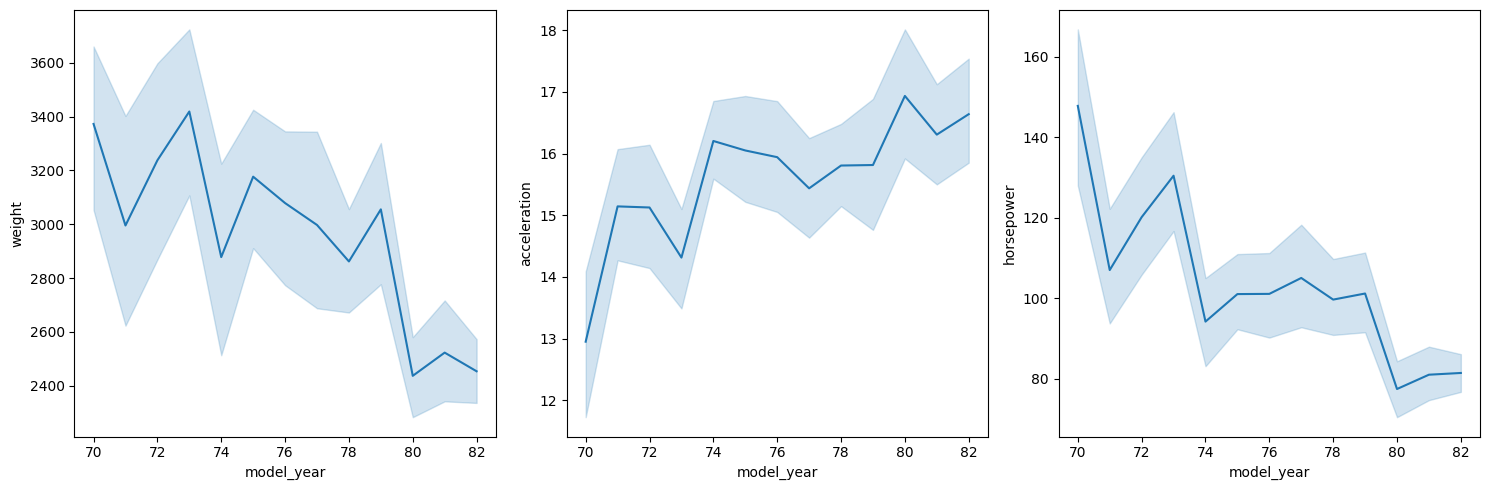

In [157]:
mpg = sns.load_dataset('mpg')

f, axes = plt.subplots(1, 3, figsize = (15, 5))
sns.lineplot(data = mpg, x = 'model_year', y = 'weight', ax = axes[0])
sns.lineplot(data = mpg, x = 'model_year', y = 'acceleration', ax = axes[1])
sns.lineplot(data = mpg, x = 'model_year', y = 'horsepower', ax = axes[2])
plt.tight_layout()
plt.show()

# Rug Plots

"A visualization technique that displays individual data points as small ticks or lines along one or both axes of a plot."

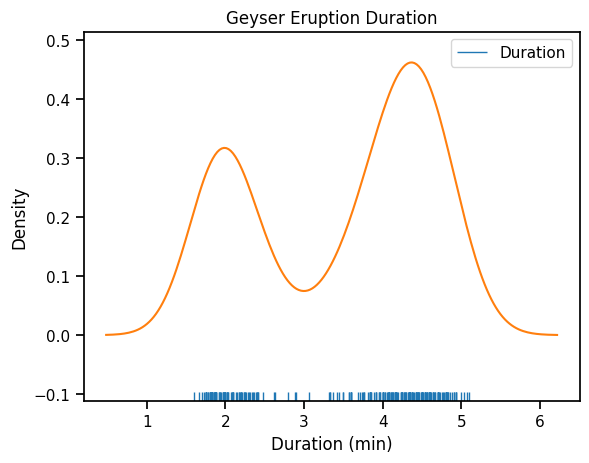

In [108]:
geyser = sns.load_dataset('geyser')
sns.rugplot(data = geyser['duration'], label = 'Duration')
sns.kdeplot(data = geyser['duration'])
sns.set_context('notebook')

plt.title("Geyser Eruption Duration")
plt.xlabel('Duration (min)')
plt.legend(loc = 'upper right')
plt.show()
# geyser

# Count Plots

They count a single variable. Don't confuse them with bar plots!

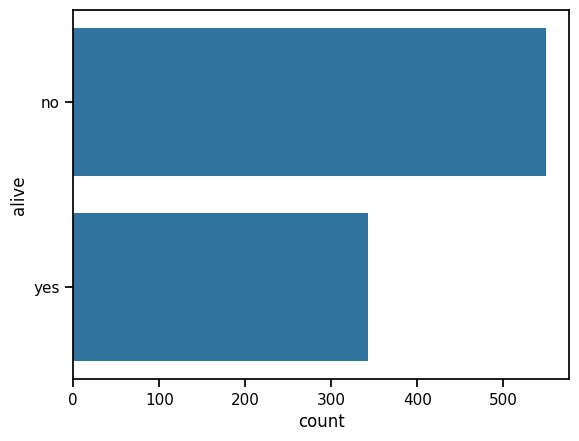

In [45]:
titanic = sns.load_dataset('titanic')
sns.countplot(data = titanic['alive'])
plt.show()
# titanic

# Violin Plots

They combine box plots with KDE plots.

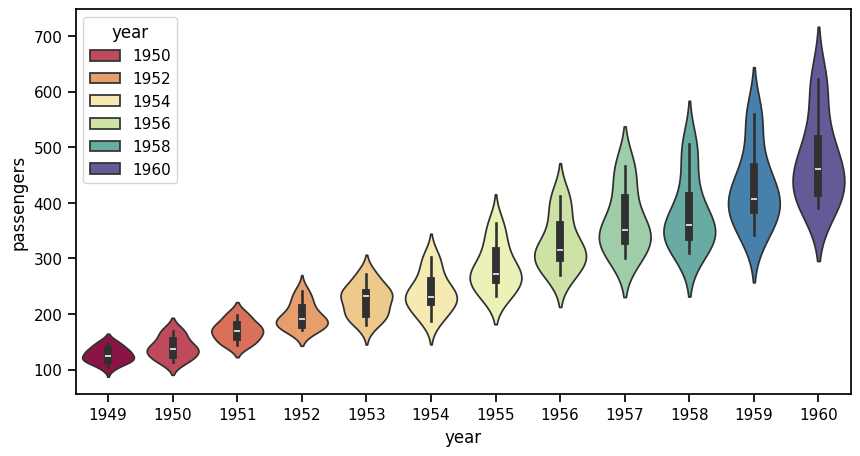

In [46]:
flights = sns.load_dataset('flights')

plt.figure(figsize = (10, 5))
sns.violinplot(data = flights, x = 'year', y = 'passengers', hue = 'year', palette = 'Spectral')
plt.show()

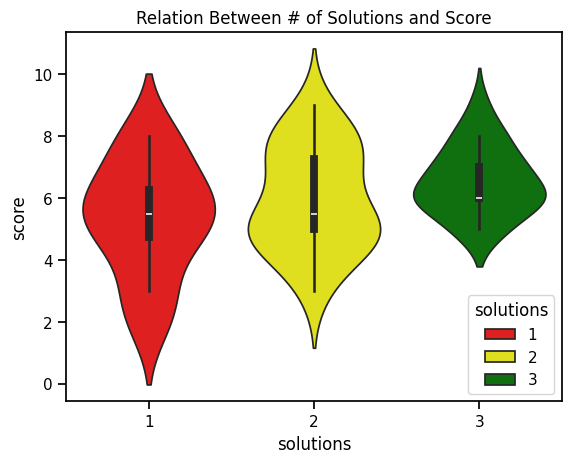

In [129]:
attention = sns.load_dataset('attention')
solsco = attention[['solutions', 'score']]

colors = {1: 'red', 2: 'yellow', 3: 'green'} 
sns.violinplot(data = solsco, x = 'solutions', y = 'score', hue = 'solutions', palette = colors)
plt.title('Relation Between # of Solutions and Score')
plt.show()

# Swarm Plots

It's like a strip plot and a violin plot.

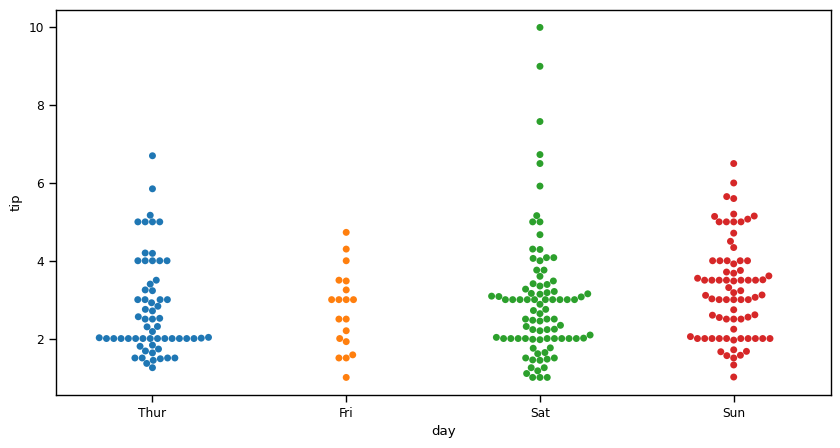

In [77]:
tips = sns.load_dataset('tips')

plt.figure(figsize = (10, 5))
sns.swarmplot(data = tips, x = 'day', y = 'tip', hue = 'day')
plt.show()